# Teste 2  - Ajuste de parâmetros

Responda as questões abaixo.

Não crie novas células nem apague células existentes. Apenas responda nas células indicadas.

Escreva o texto em Markdown e LaTeX, conforme instruções em [Jupyter - Markdown cells](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), e escreva os códigos em [Julia](https://julialang.org).

Apenas os pacotes indicados na célula abaixo podem ser utilizados para responder às questões cujas respostas requerem códigos.

In [5]:
using LinearAlgebra
using Statistics
using Optim
using Plots

## Questão 1

Suponha que tenhamos uma amostra de três medições $(x_i, y_i)$, $i=1,2,3,4$, e que queiramos determinar três parâmetros $\beta = (\beta_0, \beta_1, \beta_2)$ para que o modelo
$$ \hat y = \beta_0 + \beta_1 x + \beta_2 x^2
$$
melhor se ajuste aos dados no sentido de minimizar a soma do quadrados dos resíduos $r_i = y_i - \hat y_i$, onde $\hat y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2$.

Escreva, abaixo, uma condição nos dados da amostra que garanta que exista uma e somente uma solução para esse problema, ou seja, que exista um, e somente um, conjunto de parâmetros que minimize a soma dos quadrados dos resíduos.

Para que um sistema linear $A\mathbf{x} = \mathbf{b}$ qualquer tenha solução única, é necessário que seu núcleo seja trivial (garante a unicidade, mas não a existência), e que, denotando por $A_{*j}$ os vetores coluna de $A$, $b \in \mathrm{span}(A_{*j})$ -- o que garante a existência da solução. À primeira condição equivale dizer que $\det A \neq 0$; $A$ e $A^T$ são invertíveis; os $A_{*j}$ são linearmente independentes. Considerando que são três os parâmetros a se determinar, a matriz de Vandermonde associada a esse problema de mínimos quadrados tem que ter três colunas. Do contrário, o problema não está bem definido, o que se evidencia se considerada a forma normal do mesmo:
\begin{equation}
A^TA\boldsymbol{\beta} = A^T\mathbf{y}
\end{equation}
Em particular, essas colunas têm de ser linearmente independentes, para que esteja garantida a unicidade da solução. Observe que, também devido a $(1)$, $A$ tem de ter três linhas, porquanto são três as amostras. Logo $A$ é quadrada, e, portanto, seu determinante é dado pela fórmula:
\begin{equation*}
\det A = \prod_{i<j} (x_j - x_i)
\end{equation*} 
que é diferente de zero se, e somente se, $x_i \neq x_j$, para $i, j \in \{1, 2, 3\}$, o que garante a independencia linear das colunas, a invertibilidade de $A$ e, por conseguinte, a unicidade da solução.

## Questão 2

Considere o modelo da forma
$$ y = \frac{\alpha x}{(1 + \beta x)^3}.
$$

Ache uma mudança de variáveis que transforme esse modelo em um modelo linear nos (novos) parâmetros. Justifique o seu desenvolvimento, exibindo a mudança de variáveis e o modelo linear.

A mudança que achei é:
\begin{equation*}
\mathfrak{T}  : (y, x) \mapsto (y, -\frac{1}{1+ \beta x})
\end{equation*}
que, colocando $\gamma = \frac{\alpha}{\beta},\ \chi = -\frac{1}{1+ \beta x}$, dá o modelo
\begin{equation*}
y = \gamma\chi + \gamma
\end{equation*}
que é linear em $\gamma$.
Pra isso, partindo de 
$$
y = \frac{\alpha x}{(1 + \beta x)^3}.
$$
tomei, primeiro,
$$
1 + \beta x = \eta; \ x = \frac{\eta -1}{\beta}
$$
o que leva a
$$
y = \frac{\alpha(\eta - 1)}{\beta\eta} = \frac{\alpha}{\beta}\frac{(\eta - 1)}{\eta}
$$
donde, colocando $\gamma = \frac{\alpha}{\beta}$, obtemos
$$
y = \gamma(1-\frac{1}{\eta})
$$
onde fazemos ainda outra mudança de variável, tomando $\chi = -\frac{1}{\eta} = -\frac{1}{1+ \beta x}$. Fico incerto sobre se um parâmetro ($\beta$) pode mesmo ser englobado na mudança de variável.

## Questão 3

Em um ensaio de laboratório, foram testadas diferentes doses de uma nova droga em um certos indivíduos voluntários. Para cada nível de dosagem, 250 indivíduos foram expostos à droga e 250, a um placebo. O número de sucessos foi reportado:

| dosagem | sucesso droga | sucesso placebo
|:---:|:---:|:---:|
| 1 | 29 | 5 |
| 2 | 56 | 7 |
| 3 | 85 | 8 |
| 4 | 112 | 12 |
| 5 | 134 | 11 |
| 6 | 143 | 17 |

Use o método de mínimos quadrados para encontrar os parâmetros $\beta = (\beta_0, \beta_1)$ que melhor ajustam o modelo linear $y = \beta_0 + \beta_1 x$ aos dados acima de sucesso da droga, no sentido de minimizar a soma dos quadrados dos resíduos, onde $x=1,\ldots, 6$ indica a dosagem e $y$ indica o número de sucesso nos que receberam a droga.

1. Escreva, abaixo, o código para encontrar o vetor bidimensional $\beta = [\beta_0, \beta_1]$ com esses parâmetros;
2. Complete a definição da função $f(x)$ que retorna a estimativa do número de sucesso, para cada dosagem $x$, onde $x$ deve ser um número em ponto flutuante `Float64`.
3. Use o pacote `Plots` para exibir um gráfico dos dados e do ajuste por esse modelo linear, com os parâmetros encontrados.

A resposta de cada item acima deve estar em cada uma das células de código abaixo, conforme indicado.

In [6]:
# Resposta para o item 1 da questão 4 aqui
yi = [] # número de sucessos
β = [] # parâmetros
# YOUR CODE HERE
yi = [
        29 
        56 
        85 
        112
        134
        143
    ] #.|> Float64

A = [ones(6) collect(1:6)]
β = inv(A' * A) * A' * yi
println("Os parâmetros do melhor ajuste são β₀ = $(round(β[1], digits=3)) e β₁ = $(round(β[2], digits=3))")

Os parâmetros do melhor ajuste são β₀ = 10.067 e β₁ = 23.743


In [7]:
@assert yi isa Vector
@assert β isa Vector
@assert length(β) == 2

In [14]:
# Resposta para o item 2 da questão 4 aqui
function f(x, β)
    y = nothing
# YOUR CODE HERE
    y = sum(β[1]+β[2]*x)
    return y
end


6-element Vector{Float64}:
 1.0
 2.0
 3.0
 4.0
 5.0
 6.0

In [9]:
@assert f(1.0, [1.0, 2.0]) isa Float64

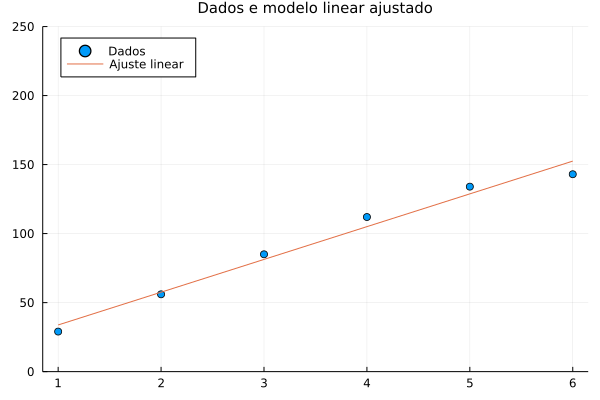

In [31]:
# Resposta para o item 3 da questão 4 aqui
# Use `plot!` e `scatter!` para traçar o ajuste e os dados "em cima" da figura criada a seguir
# Use o argumento `label` para indicar os traçados de ajuste e de dados
plot(ylim = (0.0, 250), title="Dados e modelo linear ajustado", titlefont=10, legend=:topleft)
# YOUR CODE HERE
scatter!(A[:, 2], yi, label="Dados")
plot!(A[:, 2], (x -> f(x, β)).(A[:, 2]), label="Ajuste linear")

## Questão 4

Queremos modelar um problema com valores escalares $z$ dependentes de duas variáveis $x$ e $y$ através de uma função da forma

$$ z = \frac{ \alpha xy }{ 1 + \gamma x + \delta y }
$$

Foram feitas as seguintes medições.

| x | y | z |
| :--: | :---: | :---: |
| 9.1 | 7.0 | 12.75 |
| 0.7 | 1.2 | 1.11 |
| 6.3 | 1.7 | 2.60 |
| 5.7 | 3.2 | 4.59 |
| 3.7 | 6.6 | 6.98 |
| 2.7 | 3.7 | 3.69 |
| 7.3 | 0.1 | 0.23 |
| 2.3 | 7.5 | 4.90 |
| 5.8 | 0.2 | 0.46 |
| 1.0 | 4.3 | 2.51 |
| 1.3 | 6.2 | 2.95 |
| 3.6 | 1.5 | 2.64 |
| 4.2 | 0.4 | 0.75 |
| 5.8 | 7.4 | 7.47 |
| 4.7 | 5.3 | 7.83 |
| 5.7 | 3.7 | 4.73 |
| 1.4 | 0.8 | 1.42 |
| 1.7 | 9.5 | 4.90 |
| 9.4 | 1.8 | 2.50 |
| 0.4 | 3.6 | 0.79 |

Queremos encontrar parâmetros $\alpha$, $\gamma$ e $\delta$ que melhor ajustam o modelo aos dados indicados, no sentido de minimizar a soma dos quadrados dos resíduos.
 
Assim como no modelo de Michaelis-Menten, a função acima pode ser transformada em um modelo linear em termos de parâmetros apropriados relacionados com os parâmetros acima e com mudanças adequadas nas variávels $x$, $y$ e $z$. Isso nos permite fazer o ajuste usando o método de mínimos quadrados. Também podemos fazer o ajuste do modelo na forma não linear, usando `Optim.jl`, por exemplo.

Abaixo, temos uma célula de Markdown e duas células de código.

1. Na primeira, deduza o modelo linear nos parâmetros conforme mencionado acima, indicando a relação das novas variáveis e dos novos parâmetros com as variáveis e parâmetros originais.

1. Na segunda, obtenha os parâmetros $\alpha=\alpha_q$, $\delta=\delta_q$ e $\gamma=\gamma_q$  de melhor ajuste via mínimos quadrados usando a transformação mencionada acima e calcule a soma dos quadrados dos resíduos `rss_q` para o modelos ajustado.

1. Na terceira, trabalhe diretamente com o modelo não-linear, obtenha os parâmetros $\alpha=\alpha_\textrm{opt}$, $\delta=\delta_\textrm{opt}$ e $\gamma=\gamma_\textrm{opt}$ de melhor ajuste via `Optim.jl` e calcule a soma dos quadrados dos resíduos `rss_opt` para o modelos ajustado.

Saindo de
$$ z = \frac{ \alpha xy }{ 1 + \gamma x + \delta y }
$$
calculamos:
$$
\frac{1}{z} = \frac{ 1 + \gamma x + \delta y }{ \alpha xy } = \frac{1}{\alpha x y} + \frac{\gamma}{\alpha y} + \frac{\delta}{\alpha x}
$$
Fazemos as substituições:
\begin{aligned}
\frac{1}{z} &= z^* \\
\frac{1}{x} &= x^* \\ 
\frac{1}{y} &= y^* \\
\frac{1}{\alpha} &= \alpha^* \\
\frac{\gamma}{\alpha} &= \mu \\
\frac{\delta}{\alpha} &= \nu
\end{aligned}

obtendo o modelo

$$
z^* = \alpha^* x^* y^* + \mu y^* + \nu x^*
$$
linear nos parametros $\alpha^*,\ \mu,\ \nu$.

In [40]:
# Código para a sua resposta para o item 2 da questão 5, resolvendo via minimos quadrados, aqui nesta célula

xyz = [
    9.1 7.0 12.75;
    0.7 1.2 1.11;
    6.3 1.7 2.60;
    5.7 3.2 4.59;
    3.7 6.6 6.98;
    2.7 3.7 3.69;
    7.3 0.1 0.23;
    2.3 7.5 4.90;
    5.8 0.2 0.46;
    1.0 4.3 2.51;
    1.3 6.2 2.95;
    3.6 1.5 2.64;
    4.2 0.4 0.75;
    5.8 7.4 7.47;
    4.7 5.3 7.83;
    5.7 3.7 4.73;
    1.4 0.8 1.42;
    1.7 9.5 4.90;
    9.4 1.8 2.50;
    0.4 3.6 0.79
]

α_q, γ_q, δ_q = nothing, nothing, nothing

rss_q = nothing

# YOUR CODE HERE

x, y, z = xyz[:, 1], xyz[:, 2], xyz[:, 3]
t₁(x, y, z) = x .^-1, y .^-1, z .^-1
x_, y_, z_ = t₁(x, y, z)
A = [ones(length(x)) x_ y_]
β = inv(A' * A) * A' * z_

α_q = β[1]^-1
γ_q = β[2]*α_q
δ_q = β[3]*α_q

function compute_residues(x, y, z, α, γ, δ)
        z_ = (α .* x .* y)./(1 .+ γ * x .+ δ*y)
        return rss_q = sum((z-z_) .^2)
end
rss_q = compute_residues(x, y, z, α_q, γ_q, δ_q)

println("Solução via mínimos quadrados:")
println("    Parâmetros:
        α_q = $(round(α_q, digits=3))
        γ_q = $(round(γ_q, digits=3))
        δ_q = $(round(δ_q, digits=3))")
println("    Soma dos quadrados dos resíduos:
        rss_q = $(round(rss_q, digits=3))")

Solução via mínimos quadrados:
    Parâmetros:
        α_q = -102.766
        γ_q = -42.724
        δ_q = -44.308
    Soma dos quadrados dos resíduos:
        rss_q = 22.757


In [41]:
@assert isassigned(Ref(rss_q))


In [49]:
# Código para a sua resposta para o item 3 da questão 5, resolvendo via Optim, aqui nesta célula

α_opt, γ_opt, δ_opt = nothing, nothing, nothing

rss_opt = nothing

# YOUR CODE HERE
Z(x, y, α, γ, δ) = (α .* x .* y)./(1 .+ γ * x .+ δ*y)
β₀ = [0.5, 0.5, 0.5]
# β₀ = [α_opt, γ_opt, δ_opt]
cost(β₀) = sum(abs2, z - Z(x, y, β₀[1], β₀[2], β₀[3]))
res = optimize(cost, β₀, method=GradientDescent())
β_opt = Optim.minimizer(res)
println(res)
println(β_opt)
α_opt, γ_opt, δ_opt = β_opt
rss_opt = compute_residues(x, y, z, α_opt, γ_opt, δ_opt)
println("Solução via \"Optim.jl\":")
println("    Parâmetros:
        α_opt = $(round(α_opt, digits=3))
        γ_opt = $(round(γ_opt, digits=3))
        δ_opt = $(round(δ_opt, digits=3))")
println("    Soma dos quadrados dos resíduos:
        rss_opt = $(round(rss_opt, digits=3))")

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     1.129711e+01

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 5.46e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.15e-05 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.99e-06 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.65e-07 ≰ 0.0e+00
    |g(x)|                 = 7.74e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2529
    ∇f(x) calls:   2529

[1.0611044500619506, 0.3933828905631369, 0.21124647200899724]
Solução via "Optim.jl":
    Parâmetros:
        α_opt = 1.061
        γ_opt = 0.393
        δ_opt = 0.211
    Soma dos quadrados dos resíduos:
        rss_opt = 11.297


In [50]:
@assert isassigned(Ref(rss_opt))
